In [ ]:
# %reset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import itertools
import seaborn as sns
import Eval_Metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import average_precision_score

%matplotlib inline
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

import warnings
warnings.filterwarnings('ignore')

### Train set values

In [8]:
data_train_value = pd.read_csv('C:/Users/sbadretale/Desktop/Driven Data/Pump it Up Data Mining the Water Table/Training set values.csv')

print('Number of records: ' ,data_train_value.shape[0])
print("----------  ".format(""))
print('Number of features : ' ,data_train_value.shape[1])
data_train_value.head(5)

Number of records:  59400
----------  
Number of features :  40


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


### Train set labels

In [9]:
data_train_label = pd.read_csv('C:/Users/sbadretale/Desktop/Driven Data/Pump it Up Data Mining the Water Table/Training set labels.csv')

print('Number of records: ' ,data_train_label.shape[0])
print("----------  ".format(""))
print('Number of features : ' ,data_train_label.shape[1])
data_train_label.head(5)

Number of records:  59400
----------  
Number of features :  2


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


### Train set 

In [10]:
data_train = pd.merge(data_train_value, data_train_label, on=['id'])
data_train.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### Test set 

In [15]:
data_test = pd.read_csv('C:/Users/sbadretale/Desktop/Driven Data/Pump it Up Data Mining the Water Table/Test set values.csv')

print('Number of records: ' ,data_test.shape[0])
print("----------  ".format(""))
print('Number of features : ' ,data_test.shape[1])
data_test.head(5)

Number of records:  14850
----------  
Number of features :  40


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


### Concatenate train and test set for pre-processing

In [16]:
data_train_test = pd.concat([data_train_value, data_test], axis=0)

print('Number of records: ' ,data_train_test.shape[0])
print("----------  ".format(""))
print('Number of features : ' ,data_train_test.shape[1])
data_train_test.head(5)

Number of records:  74250
----------  
Number of features :  40


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [19]:
# Check to see if there are any missing values in our data set

total = data_train_test.isnull().sum().sort_values(ascending = False)
percent = (data_train_test.isnull().sum()/data_train_test.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total out of 74250 records', 'Percent'])

,Total out of 74250 records,Percent
scheme_name,35258,47.485522
scheme_management,4846,6.526599
installer,4532,6.103704
funder,4504,6.065993
public_meeting,4155,5.595960
permit,3793,5.108418
subvillage,470,0.632997
ward,0,0.000000
lga,0,0.000000
district_code,0,0.000000


In [57]:
print('How many records (rows) have missing values out of 74250 records ?\n', data_train_test[data_train_test.isnull().any(axis=1)].shape[0])

How many records (rows) have missing values out of 74250 records ?
 39493


In [58]:
print('Number of distinct elements in "scheme name" is:\n '  ,len(list(set(data_train_test.scheme_name))))
print('Number of distinct elements in "scheme_management" is:\n '  ,len(list(set(data_train_test.scheme_management))))
print('Number of distinct elements in "installer" is:\n '  ,len(list(set(data_train_test.installer))))
print('Number of distinct elements in "funder" is:\n '  ,len(list(set(data_train_test.funder))))
print('Number of distinct elements in "public_meeting" is:\n '  ,len(list(set(data_train_test.public_meeting))))
print('Number of distinct elements in "permit" is:\n '  ,len(list(set(data_train_test.permit))))
print('Number of distinct elements in "subvillage" is:\n '  ,len(list(set(data_train_test.subvillage))))

Number of distinct elements in "scheme name" is:
  2869
Number of distinct elements in "scheme_management" is:
  13
Number of distinct elements in "installer" is:
  2411
Number of distinct elements in "funder" is:
  2141
Number of distinct elements in "public_meeting" is:
  3
Number of distinct elements in "permit" is:
  3
Number of distinct elements in "subvillage" is:
  21426


In [32]:
# Duplicate rows? No

print('Number of duplicate records are :\n' , 
      sum( data_train_test.drop(
          columns=['scheme_name', 'scheme_management', 'installer', 'funder', 'public_meeting', 'permit', 'subvillage'] ).duplicated() ))

Number of duplicate records are :
 0


In [35]:
data_train_test.columns.to_series().groupby(data_train_test.dtypes).groups

{dtype('int64'): Index(['id', 'gps_height', 'num_private', 'region_code', 'district_code',
        'population', 'construction_year'],
       dtype='object'),
 dtype('float64'): Index(['amount_tsh', 'longitude', 'latitude'], dtype='object'),
 dtype('O'): Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
        'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
        'scheme_management', 'scheme_name', 'permit', 'extraction_type',
        'extraction_type_group', 'extraction_type_class', 'management',
        'management_group', 'payment', 'payment_type', 'water_quality',
        'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
        'source_class', 'waterpoint_type', 'waterpoint_type_group'],
       dtype='object')}

"public_meeting" feature is consist of:  [nan, True, False]


Text(0.5,1,'"public_meeting" Distribution in Train set')

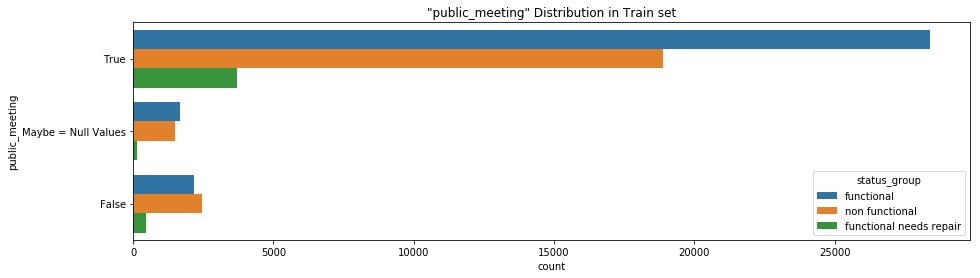

In [51]:
print('"public_meeting" feature is consist of: '  ,list(set(data_train_test.public_meeting)))
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="public_meeting", hue=data_train['status_group'], data= data_train[['public_meeting']].fillna('Maybe = Null Values')).set_title('"public_meeting" Distribution in Train set')

"permit" feature is consist of:  [False, True, nan]


Text(0.5,1,'"permit" Distribution in Train set')

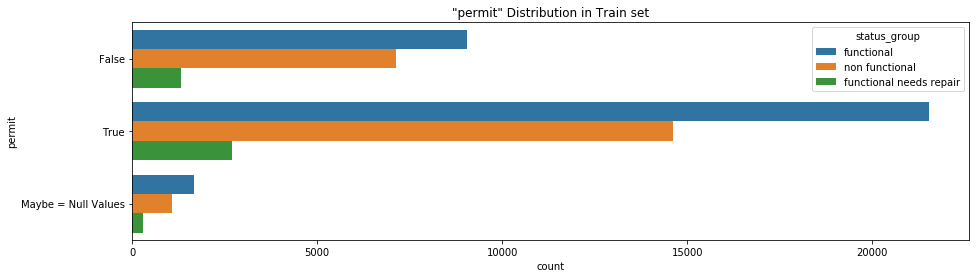

In [52]:
print('"permit" feature is consist of: '  ,list(set(data_train_test.permit)))
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="permit", hue=data_train['status_group'], data= data_train[['permit']].fillna('Maybe = Null Values')).set_title('"permit" Distribution in Train set')

In [53]:
import warnings
warnings.filterwarnings('ignore')

import pandas_profiling
pandas_profiling.ProfileReport(data_train_test)

Number of variables,41
Number of observations,74250
Total Missing (%),1.9%
Total size in memory,23.2 MiB
Average record size in memory,328.0 B
Numeric,11
Categorical,29
Boolean,0
Date,0
Text (Unique),0
Rejected,1


### I rejected the "recorded_by" column isnce it is comprised of onle 1 value.

In [70]:
print('"recorded_by" feature is consist of: '  ,list(set(data_train_test.recorded_by)))

"recorded_by" feature is consist of:  ['GeoData Consultants Ltd']


### For the Skewed features, I plot those features to get better understanding
#### As we can see, most of the values are near zero

Text(0.5,1,'amount_tsh Distribution - "amount_tsh"')

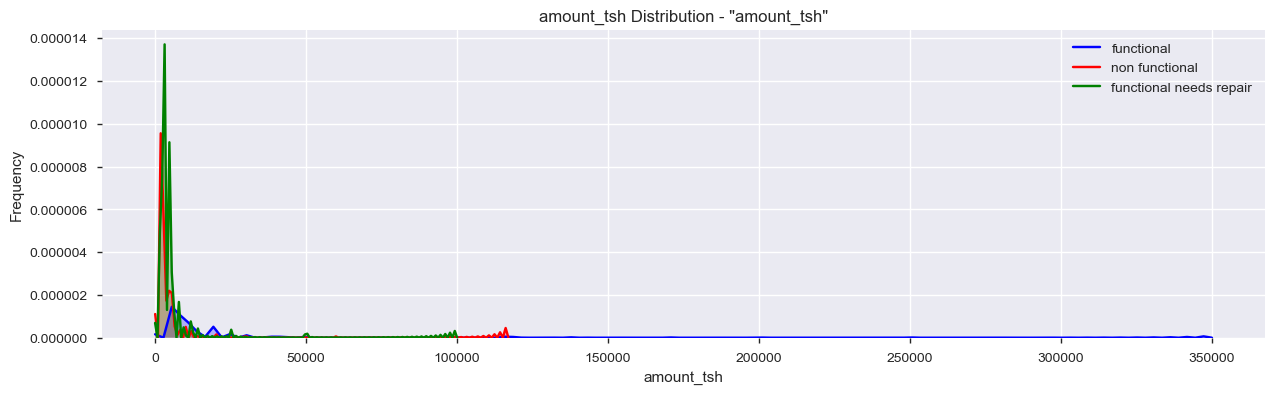

In [83]:
i = data_train.columns.get_loc("amount_tsh")
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(data_train.loc[(data_train['status_group'] == 'functional'),data_train.columns[i]] , color='b',shade=True,label='functional')
ax=sns.kdeplot(data_train.loc[(data_train['status_group'] == 'non functional'),data_train.columns[i]] , color='r',shade=True, label='non functional')
ax=sns.kdeplot(data_train.loc[(data_train['status_group'] == 'functional needs repair'),data_train.columns[i]] , color='g',shade=True, label='functional needs repair')
ax.set(xlabel=data_train.columns[i], ylabel='Frequency')
plt.title( data_train.columns[i] + ' Distribution - "amount_tsh"')

Text(0.5,1,'num_private Distribution - "num_private"')

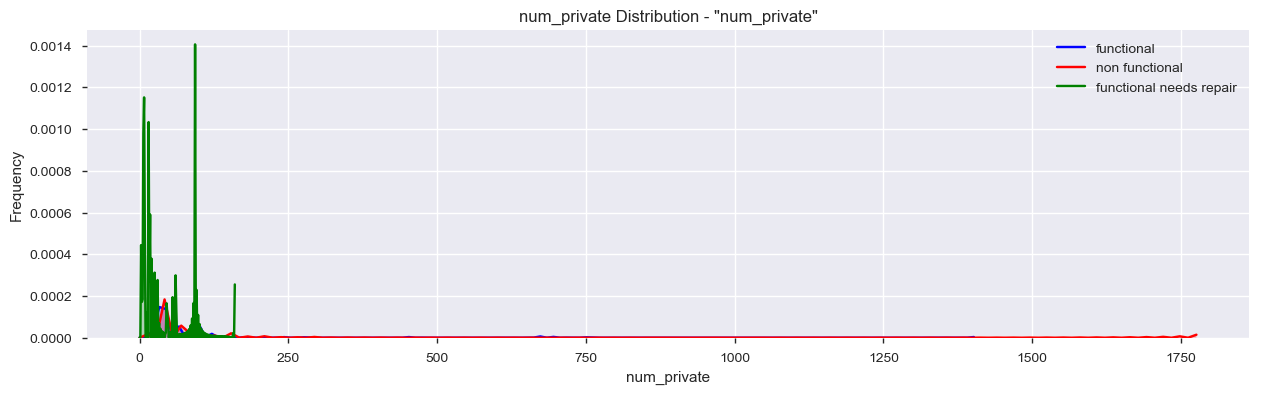

In [103]:
i = data_train.columns.get_loc("num_private")
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(data_train.loc[(data_train['status_group'] == 'functional'),data_train.columns[i]] , color='b',shade=True,label='functional')
ax=sns.kdeplot(data_train.loc[(data_train['status_group'] == 'non functional'),data_train.columns[i]] , color='r',shade=True, label='non functional')
ax=sns.kdeplot(data_train.loc[(data_train['status_group'] == 'functional needs repair'),data_train.columns[i]] , color='g',shade=True, label='functional needs repair')
ax.set(xlabel=data_train.columns[i], ylabel='Frequency')
plt.title( data_train.columns[i] + ' Distribution - "num_private"')

### In the search for normality
- **Histogram** - Kurtosis and skewness.
- **Normal probability plot** - Data distribution should closely follow the diagonal that represents the normal distribution.

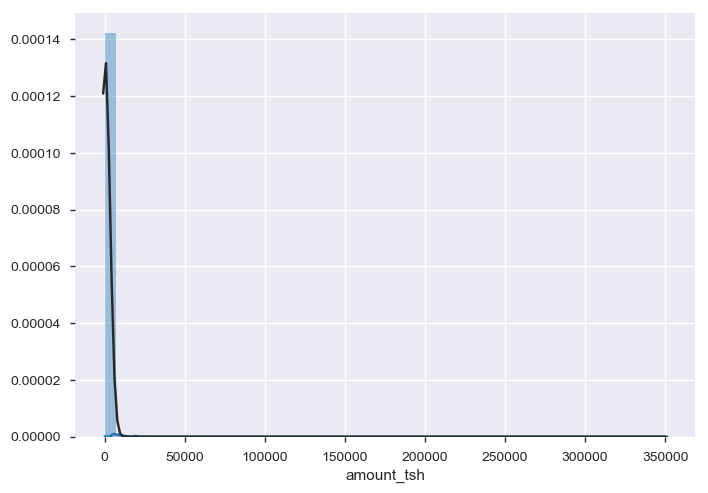

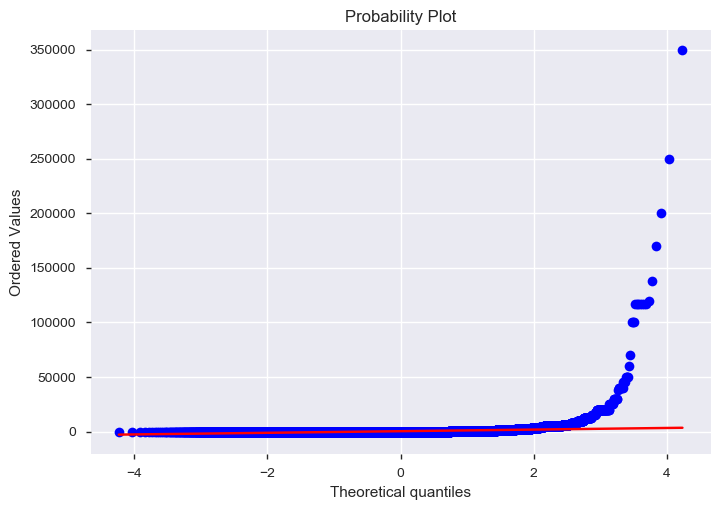

In [106]:
#histogram and normal probability plot
from scipy import stats
sns.distplot(data_train['amount_tsh'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(data_train['amount_tsh'], plot=plt)

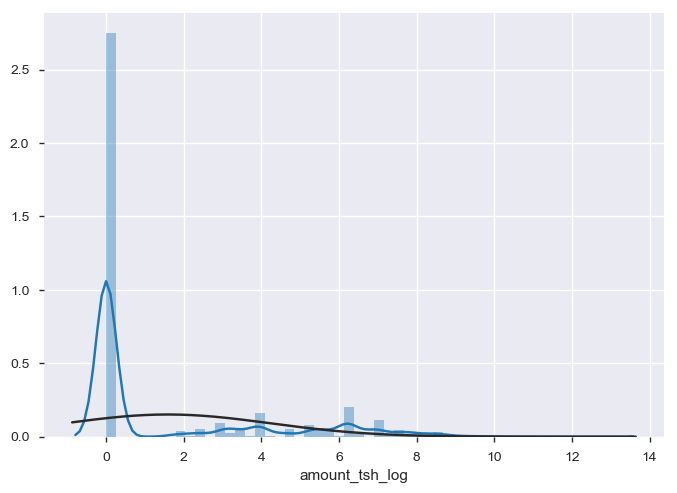

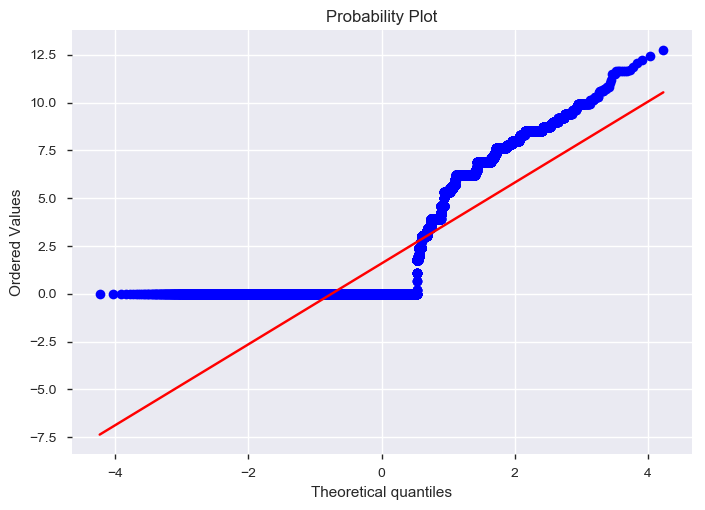

In [107]:
#applying log transformation
data_train['amount_tsh_log'] = (1+data_train['amount_tsh']).apply(np.log)

sns.distplot(data_train['amount_tsh_log'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(data_train['amount_tsh_log'], plot=plt)

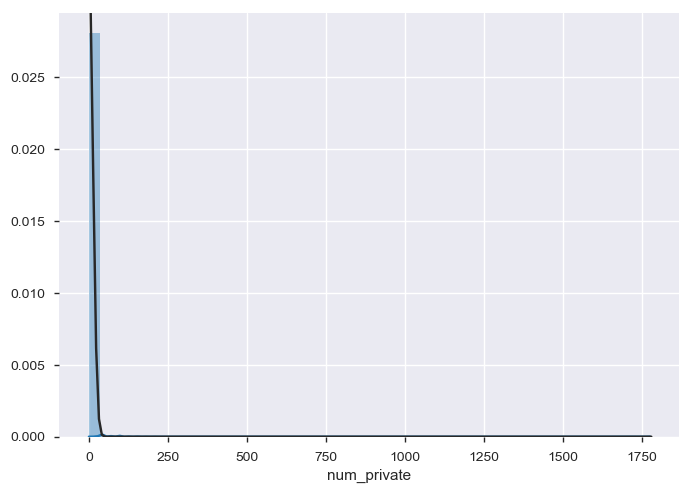

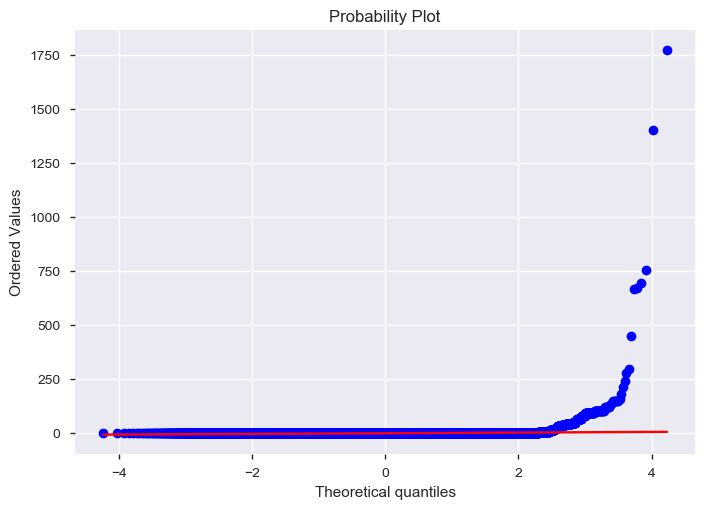

In [108]:
#histogram and normal probability plot
sns.distplot(data_train['num_private'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(data_train['num_private'], plot=plt)

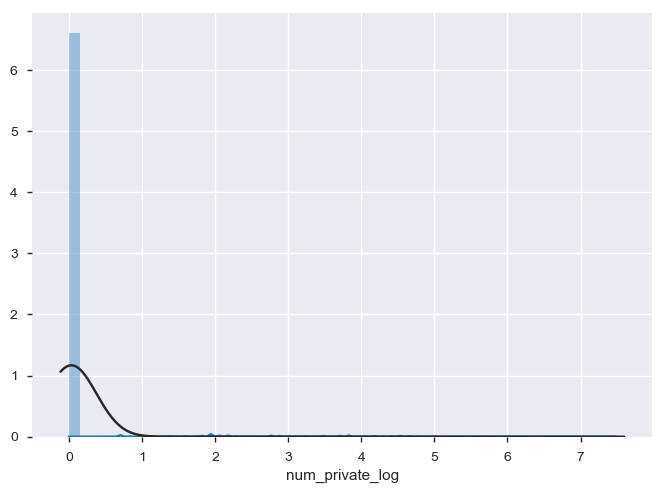

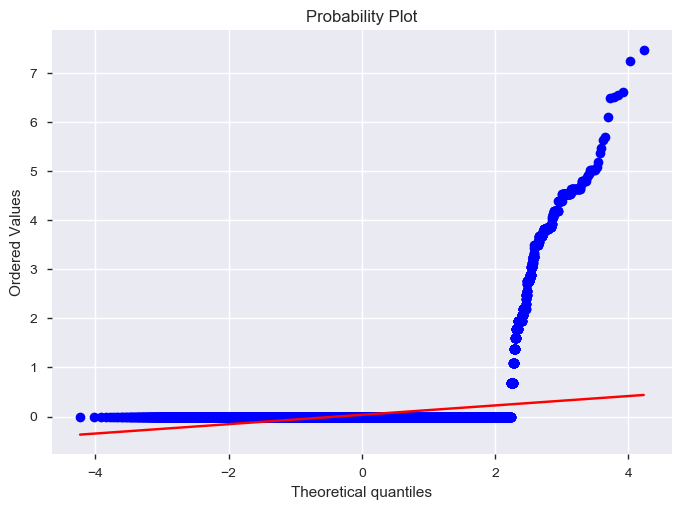

In [109]:
#applying log transformation
data_train['num_private_log'] = (1+data_train['num_private']).apply(np.log)

sns.distplot(data_train['num_private_log'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(data_train['num_private_log'], plot=plt)

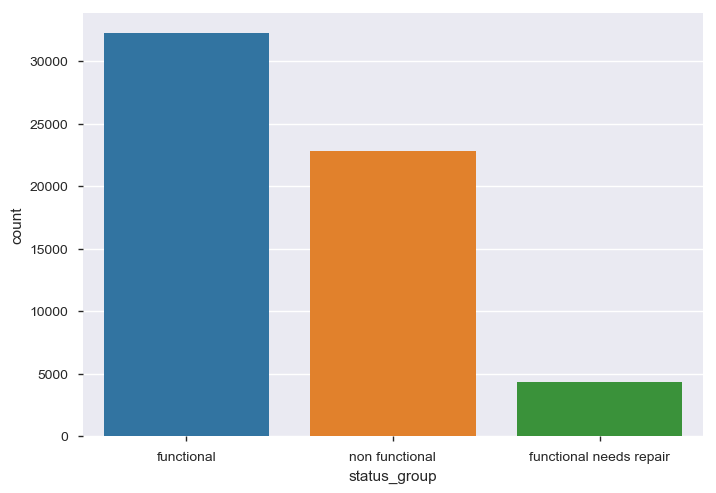

In [54]:
ax = sns.countplot(data_train['status_group'] , label = "Count")  

In [ ]:
#convert categorical variable into dummy
# df_train = pd.get_dummies(df_train)